# Notes for 8 September

Today we'll play with real data on the number of books read per hour on [Tar Heel Reader](https://tarheelreader.org) over a 3 week period.

My goal is to cover the last few functions you'll need to complete assignment 1.

Next week, we'll back up a bit and make sure we understand what has been covered so far.

In [2]:
%matplotlib inline
import numpy as np
import pylab

# this next command fetches a datafile from the internet
url = 'https://wwwx.cs.unc.edu/Courses/comp116-f17/media/hourly.txt'
hourly = np.genfromtxt(url)
print(hourly)

[  3.13000000e+02   2.70000000e+01   1.50000000e+01   5.40000000e+01
   4.00000000e+00   1.70000000e+01   1.60000000e+01   3.80000000e+01
   5.20000000e+01   2.00000000e+01   8.30000000e+01   2.20000000e+01
   7.10000000e+01   4.80000000e+01   4.30000000e+01   9.00000000e+01
   9.40000000e+01   3.00000000e+01   9.00000000e+01   1.34000000e+02
   7.60000000e+01   6.40000000e+01   6.20000000e+01   5.00000000e+01
   3.20000000e+01   2.80000000e+01   2.50000000e+01   1.90000000e+01
   4.70000000e+01   5.50000000e+01   5.20000000e+01   7.70000000e+01
   3.66000000e+02   5.92000000e+02   7.97000000e+02   6.29000000e+02
   8.19000000e+02   7.66000000e+02   7.73000000e+02   4.38000000e+02
   4.55000000e+02   2.04000000e+02   1.31000000e+02   1.20000000e+02
   9.50000000e+01   1.48000000e+02   1.28000000e+02   4.00000000e+01
   2.10000000e+01   4.00000000e+00   2.90000000e+01   2.00000000e+01
   5.30000000e+01   1.80000000e+01   3.50000000e+01   1.05000000e+02
   1.67000000e+02   5.20000000e+02

How many hours of data?

In [3]:
len(hourly)

504

Three weeks of 7 days of 24 hours.

In [4]:
3 * 7 * 24

504

We can look at what we've got.

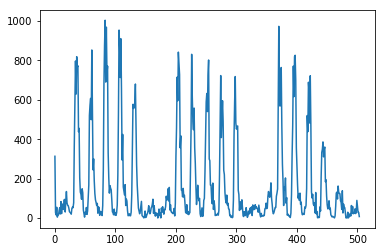

In [5]:
pylab.plot(hourly)

We can **reshape** the array to have a row per day instead of simply being a 1D array of hours. The daily array below will have 21 rows of 24 columns each. It looks a bit like 3 columns but that is just how it is printed. You have to look carefully for the square brackets to see that a single row takes up multiple lines below.

In [6]:
daily = np.reshape(hourly, (21, 24))
daily

array([[  3.13000000e+02,   2.70000000e+01,   1.50000000e+01,
          5.40000000e+01,   4.00000000e+00,   1.70000000e+01,
          1.60000000e+01,   3.80000000e+01,   5.20000000e+01,
          2.00000000e+01,   8.30000000e+01,   2.20000000e+01,
          7.10000000e+01,   4.80000000e+01,   4.30000000e+01,
          9.00000000e+01,   9.40000000e+01,   3.00000000e+01,
          9.00000000e+01,   1.34000000e+02,   7.60000000e+01,
          6.40000000e+01,   6.20000000e+01,   5.00000000e+01],
       [  3.20000000e+01,   2.80000000e+01,   2.50000000e+01,
          1.90000000e+01,   4.70000000e+01,   5.50000000e+01,
          5.20000000e+01,   7.70000000e+01,   3.66000000e+02,
          5.92000000e+02,   7.97000000e+02,   6.29000000e+02,
          8.19000000e+02,   7.66000000e+02,   7.73000000e+02,
          4.38000000e+02,   4.55000000e+02,   2.04000000e+02,
          1.31000000e+02,   1.20000000e+02,   9.50000000e+01,
          1.48000000e+02,   1.28000000e+02,   4.00000000e+01],
      

We could accomplish the same thing as above by making the number of rows be -1. That doesn't make sense so it figures out the number of rows for you. This way you don't need to now how many rows there will be in advance.

In [7]:
np.reshape(hourly, (-1, 24))

array([[  3.13000000e+02,   2.70000000e+01,   1.50000000e+01,
          5.40000000e+01,   4.00000000e+00,   1.70000000e+01,
          1.60000000e+01,   3.80000000e+01,   5.20000000e+01,
          2.00000000e+01,   8.30000000e+01,   2.20000000e+01,
          7.10000000e+01,   4.80000000e+01,   4.30000000e+01,
          9.00000000e+01,   9.40000000e+01,   3.00000000e+01,
          9.00000000e+01,   1.34000000e+02,   7.60000000e+01,
          6.40000000e+01,   6.20000000e+01,   5.00000000e+01],
       [  3.20000000e+01,   2.80000000e+01,   2.50000000e+01,
          1.90000000e+01,   4.70000000e+01,   5.50000000e+01,
          5.20000000e+01,   7.70000000e+01,   3.66000000e+02,
          5.92000000e+02,   7.97000000e+02,   6.29000000e+02,
          8.19000000e+02,   7.66000000e+02,   7.73000000e+02,
          4.38000000e+02,   4.55000000e+02,   2.04000000e+02,
          1.31000000e+02,   1.20000000e+02,   9.50000000e+01,
          1.48000000e+02,   1.28000000e+02,   4.00000000e+01],
      

We can get the total number of books read

In [8]:
np.sum(hourly)

86353.0

And, of course, we get the same number adding up daily. Its the same data just reorganized.

In [9]:
np.sum(daily)

86353.0

Then we thought about which **axis** we needed to get the totals per day. axis=0 gives us the totals for each hour. I can tell because there are 24 numbers below.

In [10]:
np.sum(daily, axis=0)

array([   871.,    449.,    435.,    378.,    490.,    464.,    598.,
         1183.,   3852.,   7393.,  10287.,   9115.,   8897.,   9883.,
         9101.,   5346.,   4405.,   2544.,   1978.,   2056.,   1926.,
         2070.,   1369.,   1263.])

**axis** = 1 gives us the total per day. We are removing the columns dimension using sum and getting 21 numbers as a result.

In [11]:
np.sum(daily, axis=1)

array([ 1513.,  6836.,  5260.,  7497.,  6619.,  4851.,   720.,  1253.,
        6305.,  5315.,  5665.,  4672.,  4404.,   882.,  1438.,  6451.,
        6105.,  5095.,  3286.,  1556.,   630.])

We can pile the expressions together and plot the number of books read for each day.

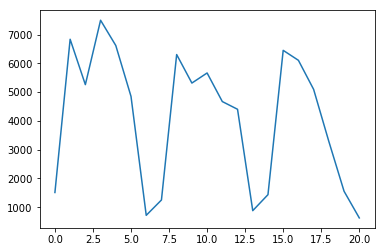

In [12]:
pylab.plot(np.sum(daily, axis=1))

A bar graph would be more appropriate for this kind of data.

<Container object of 21 artists>

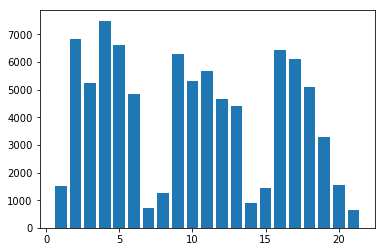

In [13]:
pylab.bar(np.arange(1,22), np.sum(daily, axis=1))

We could look at the sums per hour the same way.

<Container object of 24 artists>

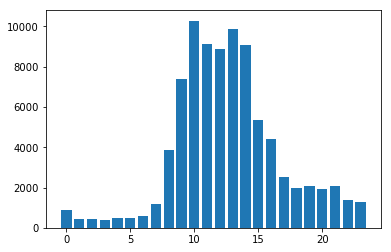

In [14]:
pylab.bar(np.arange(0,24), np.sum(daily, axis=0))

If we needed the values for the last day we can use an index of -1 as we learned earlier.

In [15]:
daily[-1,:]

array([ 26.,   0.,   2.,   0.,  29.,   0.,   7.,   8.,  22.,  10.,  63.,
        23.,  58.,  21.,  26.,  23.,  46.,  22.,  33.,  89.,  59.,  28.,
        28.,   7.])

Suppose we want the total number of books read so far. This is like an integral. 

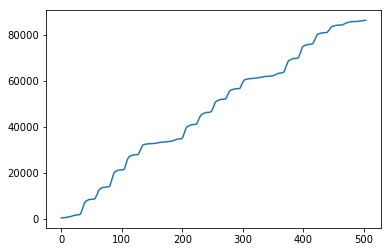

In [16]:
pylab.plot(np.cumsum(hourly))

We can also get the change in number of books read per hour. This is just subtracting successive values.

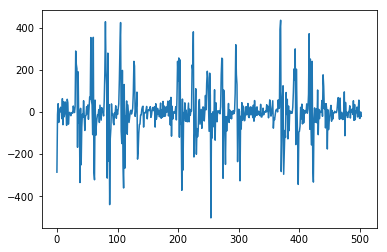

In [17]:
pylab.plot(np.diff(hourly))

We can see that easier with a small array.

In [18]:
np.diff([1,5,3,11,4])

array([ 4, -2,  8, -7])

Note that **cumsum** and **diff** are approximately inverses of one another. The vertical offset is different because we lost that first number in the diff. It's a bit like needing to add the constant C when you do an integral.

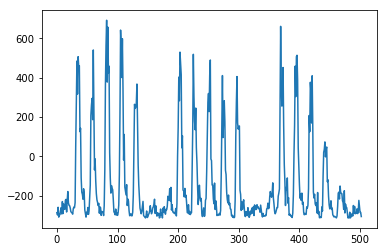

In [19]:
pylab.plot(np.cumsum(np.diff(hourly)))

I failed to talk about how to find days where any values met some test or where all values met some test. These are also needed for the assignment.

Suppose I want to know which days have any hours exceeding 1000 books read?

In [20]:
np.any(daily > 1000, axis=1)

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

Above we've got 21 boolean values. The value is True is **any** hour during that day exceeding 1000. We got it by comparing every hour to 1000, resulting in a matrix of True/False values and then applying **any** along the rows.

We could also ask questions like "Which days had all hours less than 200?".

In [21]:
np.all(daily < 200, axis=1)

array([False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True,  True], dtype=bool)

We could count how many there are of each type using **np.count_nonzero**.